In [8]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from PIL import Image
import numpy as np
import skimage.io as io
import tensorflow as tf
import matplotlib.pyplot as plt
import pascal3d

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


ImportError: No module named pascal3d

In [9]:
import pascal3d

ImportError: No module named pascal3d

In [50]:
reconstructed_records = []
record_iterator = tf.python_io.tf_record_iterator(path="/notebooks/selerio/test.tfrecords")

for string_record in record_iterator:
    
    example = tf.train.Example()
    example.ParseFromString(string_record)    
    
    output_vector = example.features.feature['output_vector'].float_list.value
    
    img_string = (example.features.feature['object_image']
                                  .bytes_list
                                  .value[0])

    
    img_1d = np.fromstring(img_string, dtype=np.uint8)
    reconstructed_img = img_1d.reshape((224, 224, -1))
    
    reconstructed_records.append((reconstructed_img, output_vector))
    

/usr/local/lib/python3.4/site-packages/ipykernel_launcher.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  app.launch_new_instance()


<IPython.core.display.Javascript object>


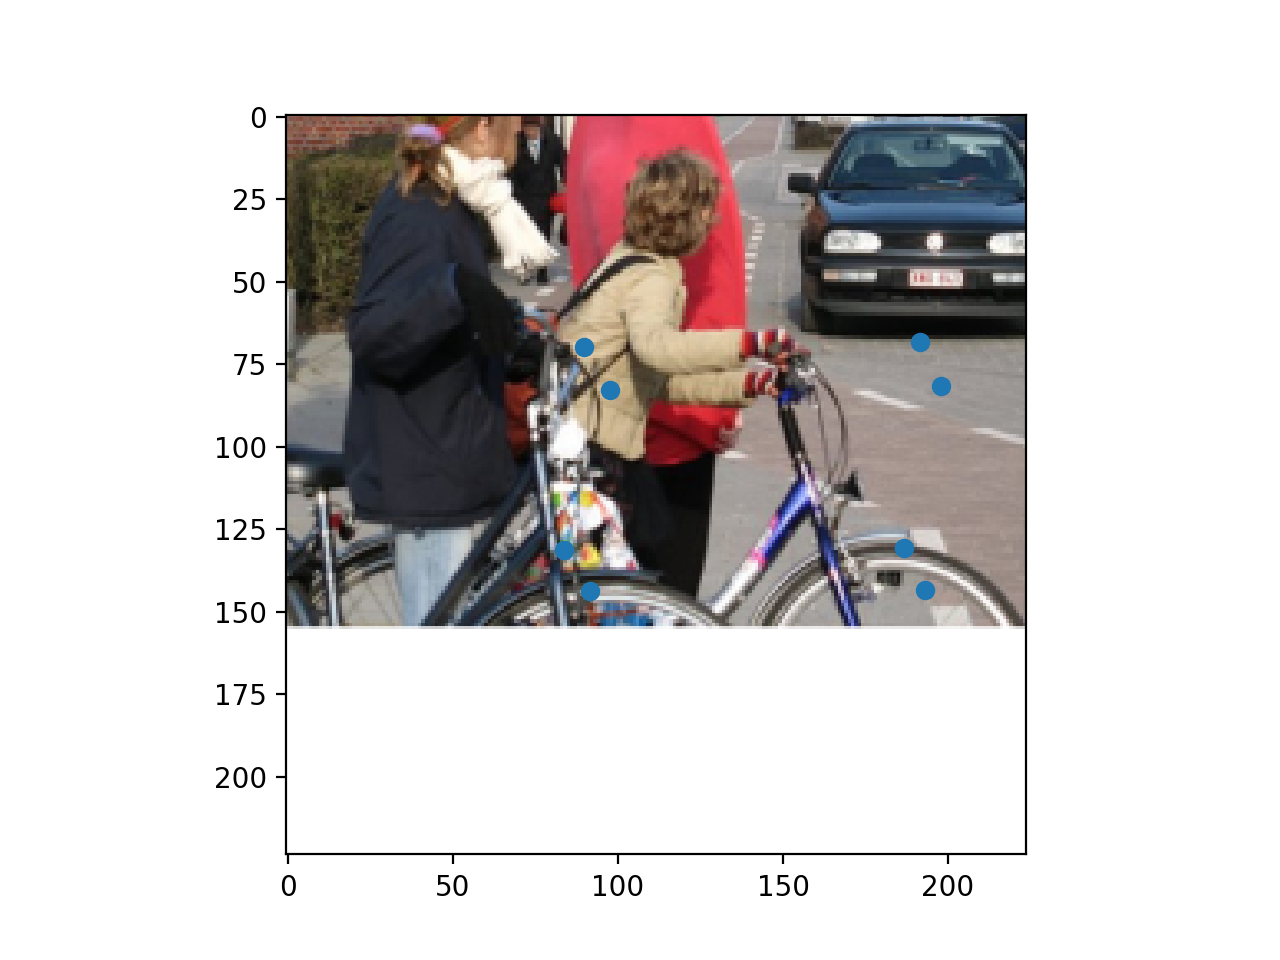

(224, 224, 3)


<IPython.core.display.Javascript object>


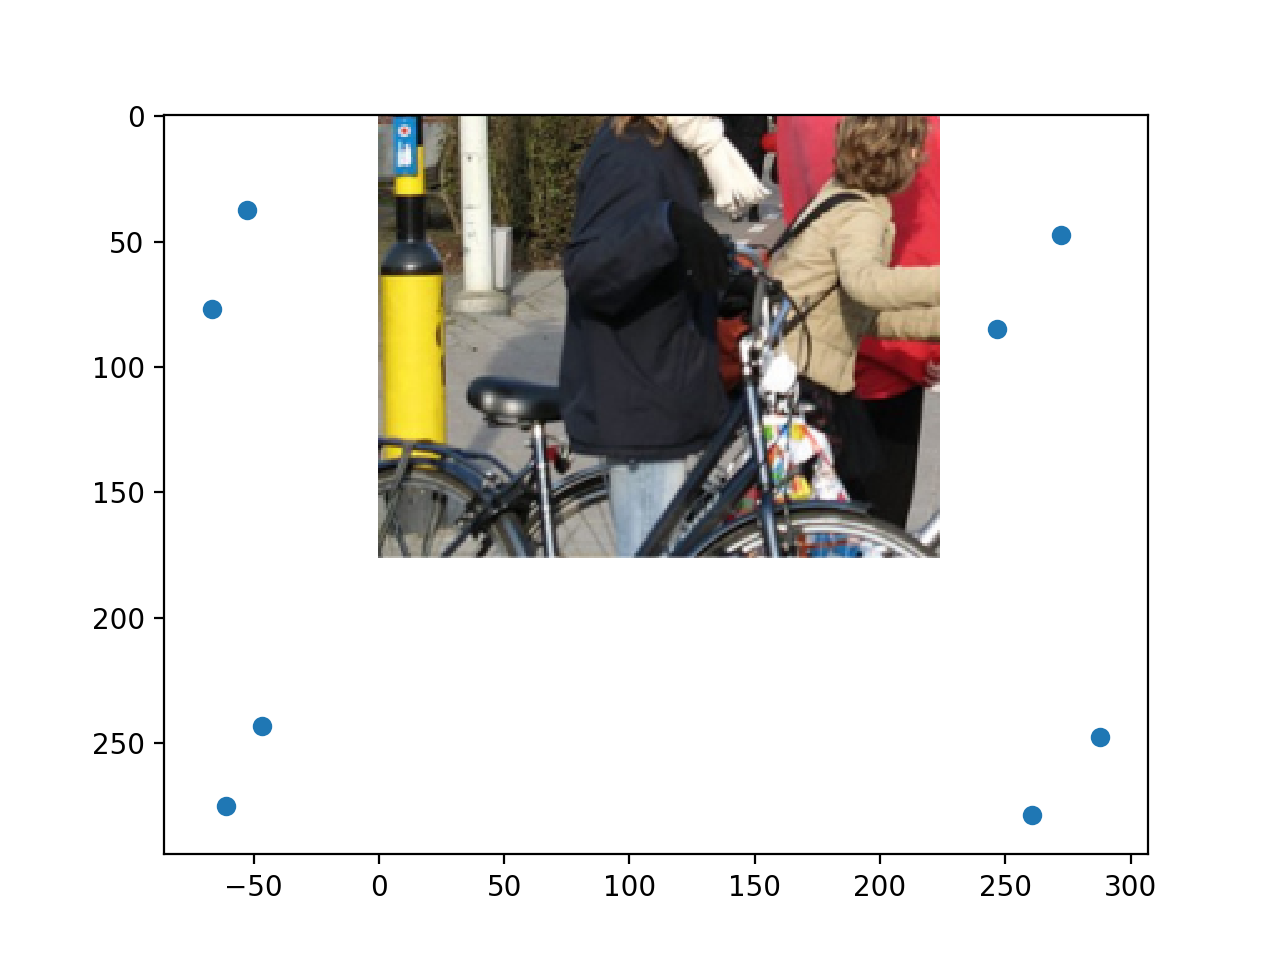

(224, 224, 3)


<IPython.core.display.Javascript object>


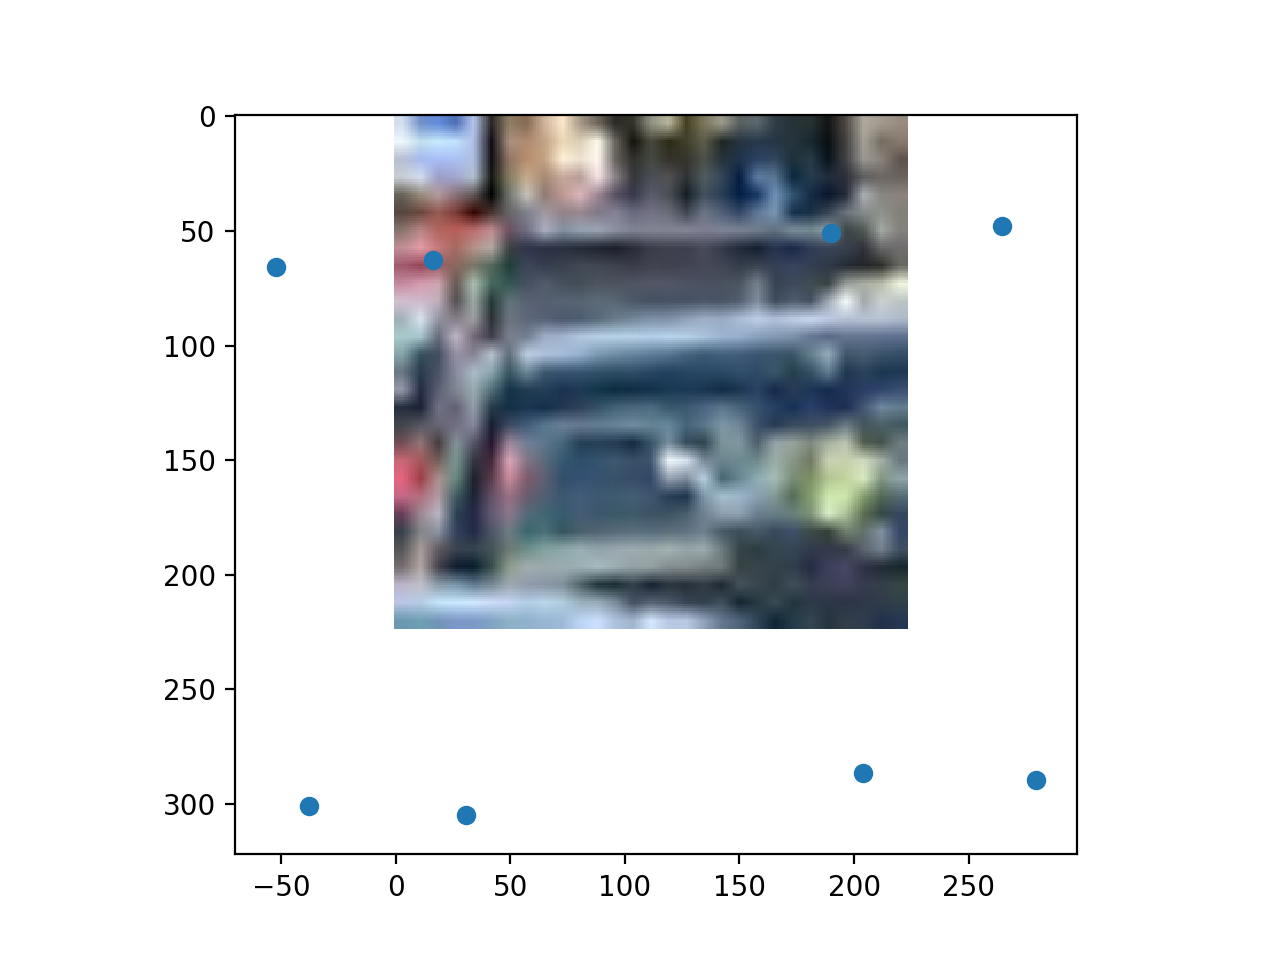

(224, 224, 3)


/usr/local/lib/python3.4/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


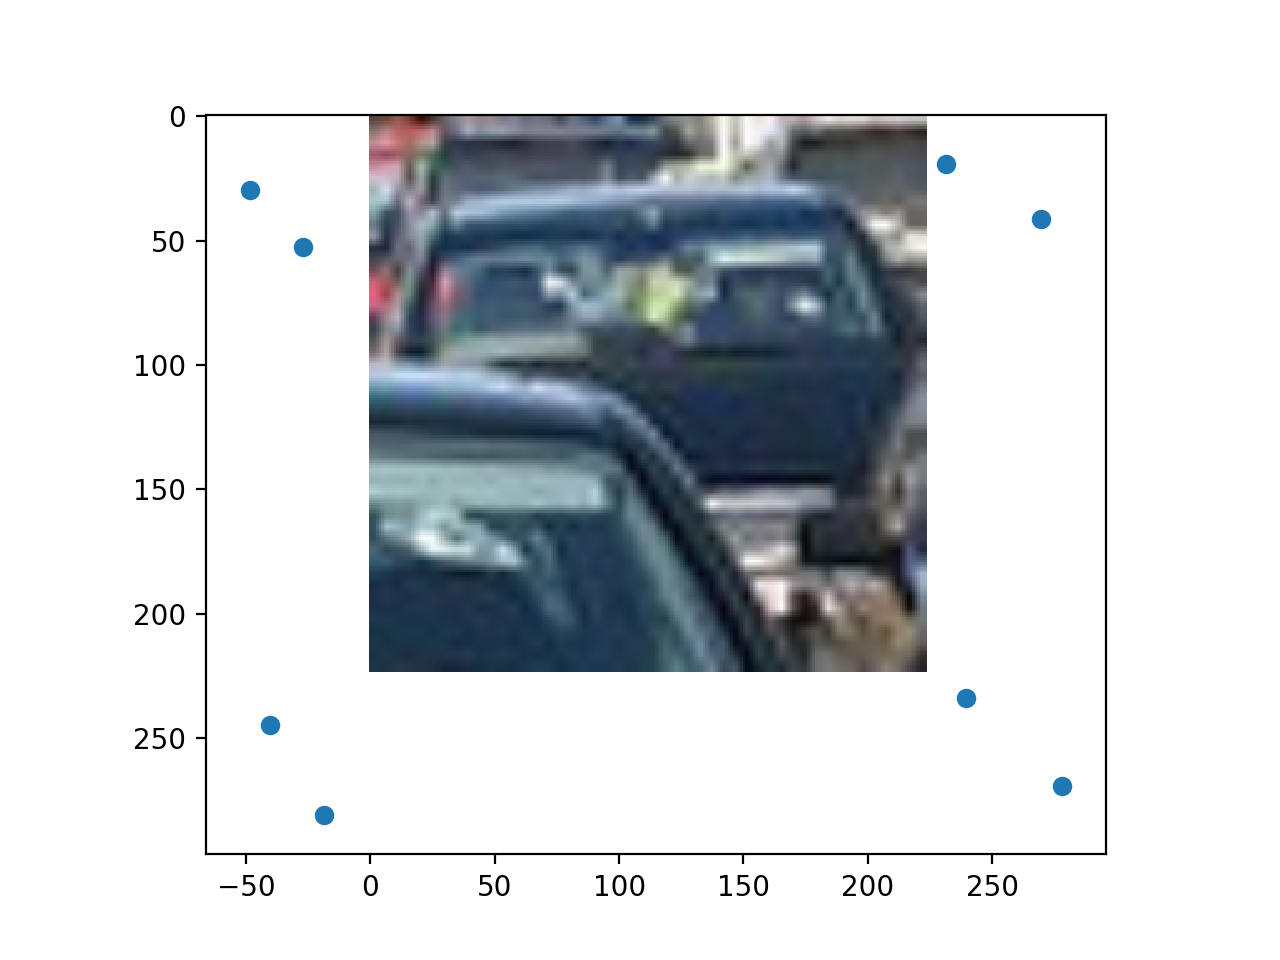

(224, 224, 3)


<IPython.core.display.Javascript object>


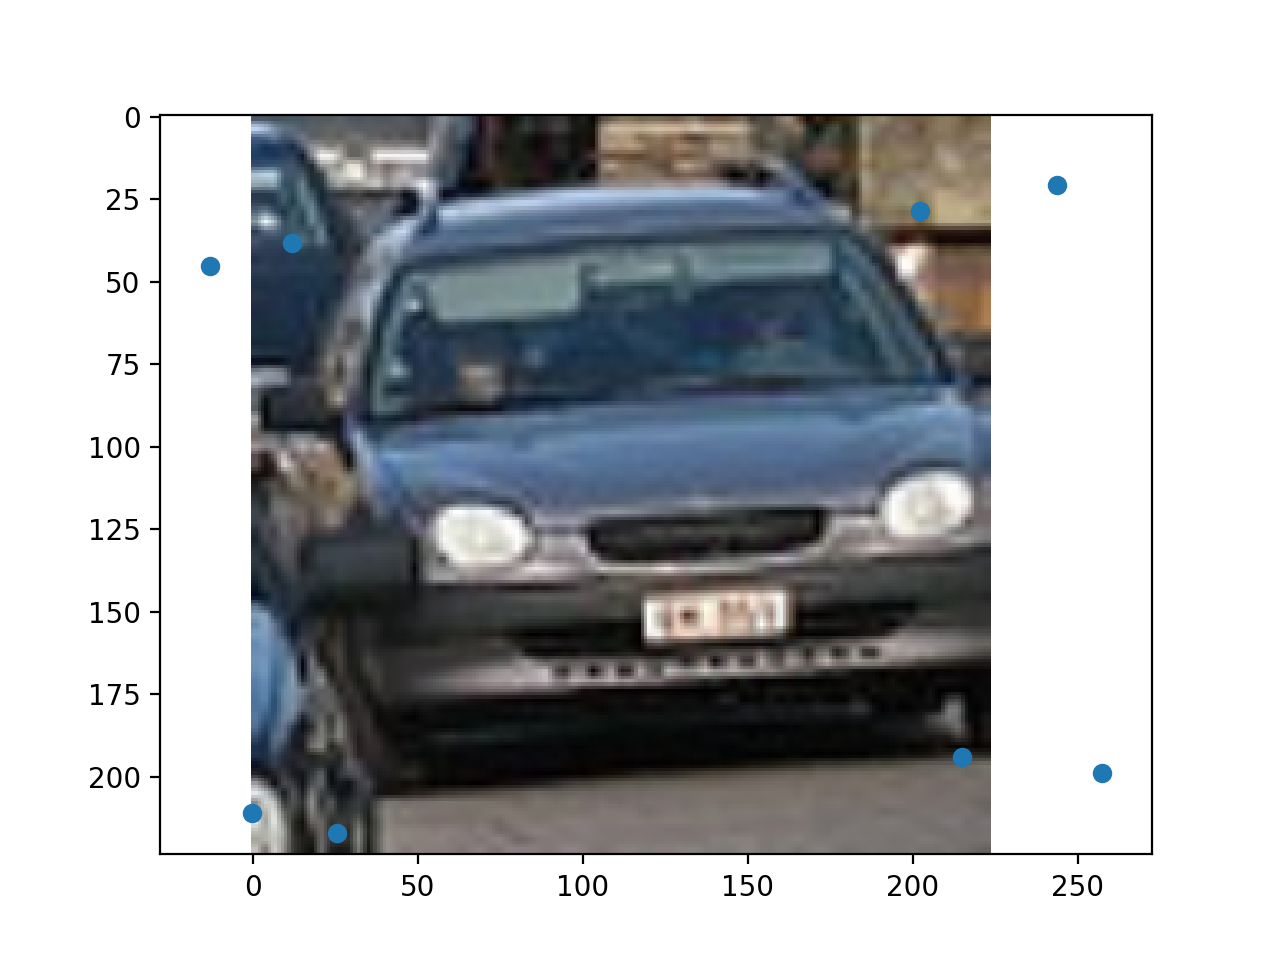

(224, 224, 3)


<IPython.core.display.Javascript object>


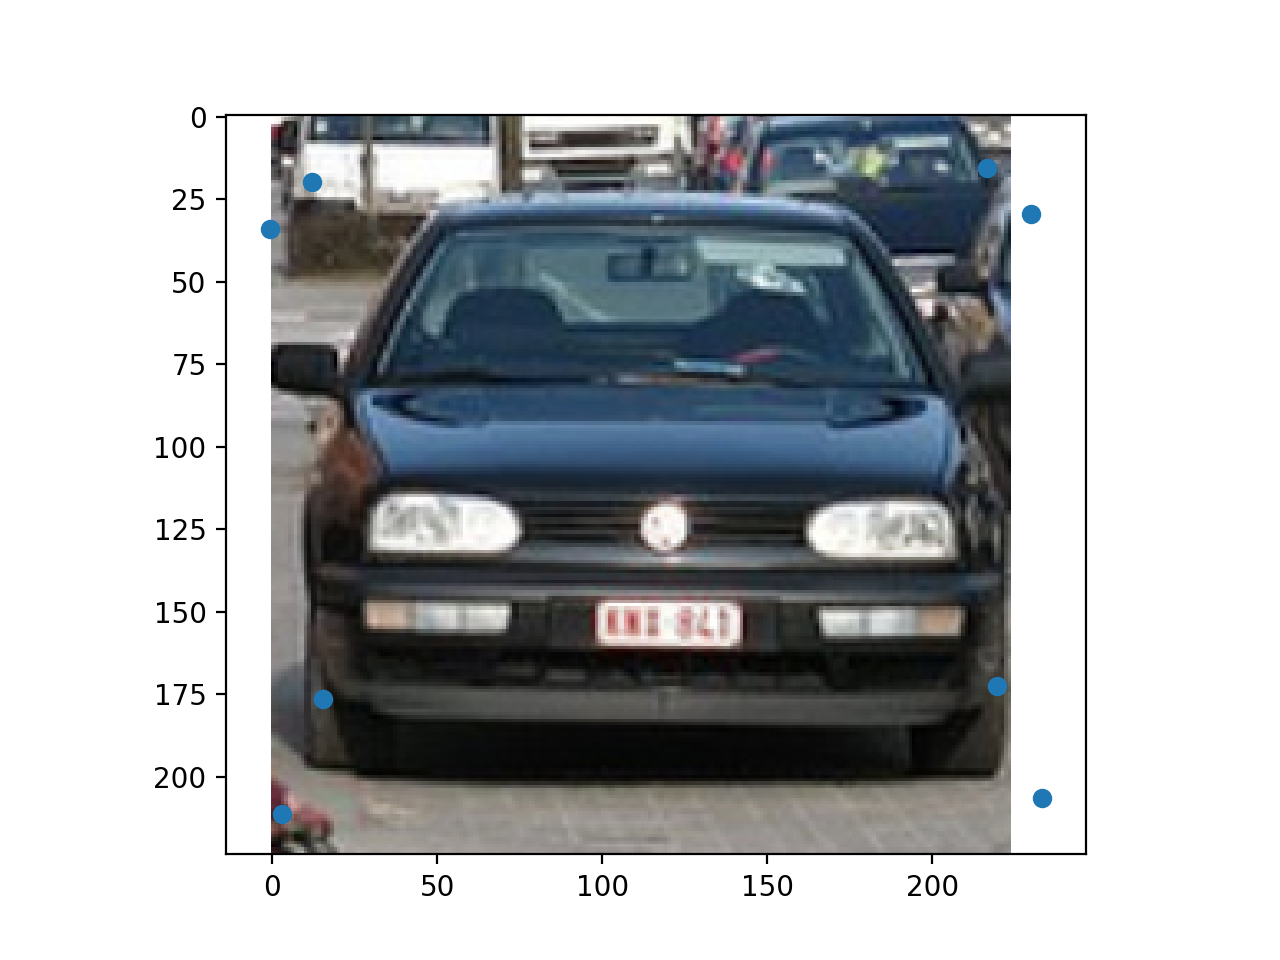

(224, 224, 3)


<IPython.core.display.Javascript object>


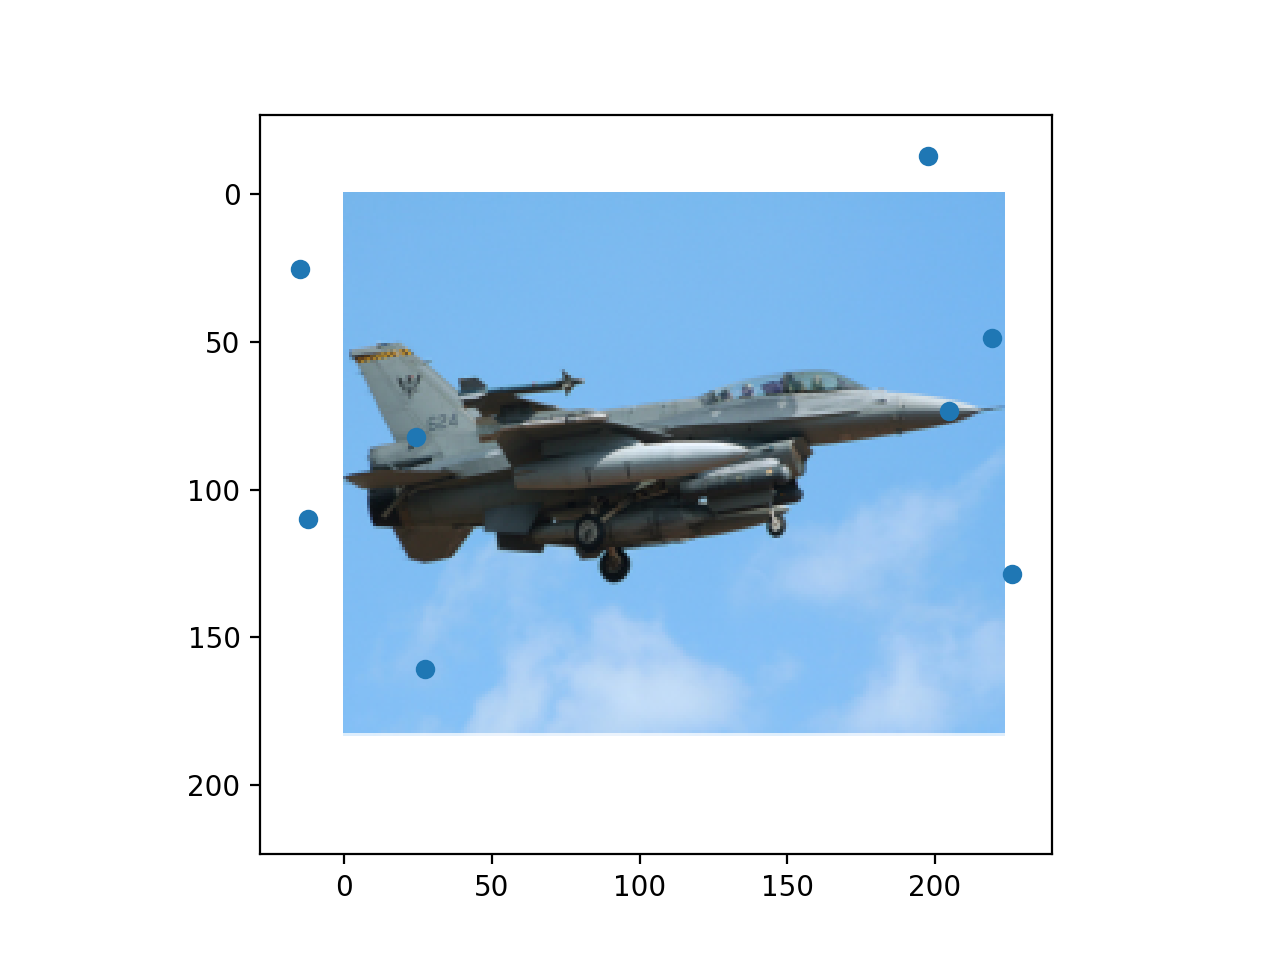

(224, 224, 3)


<IPython.core.display.Javascript object>


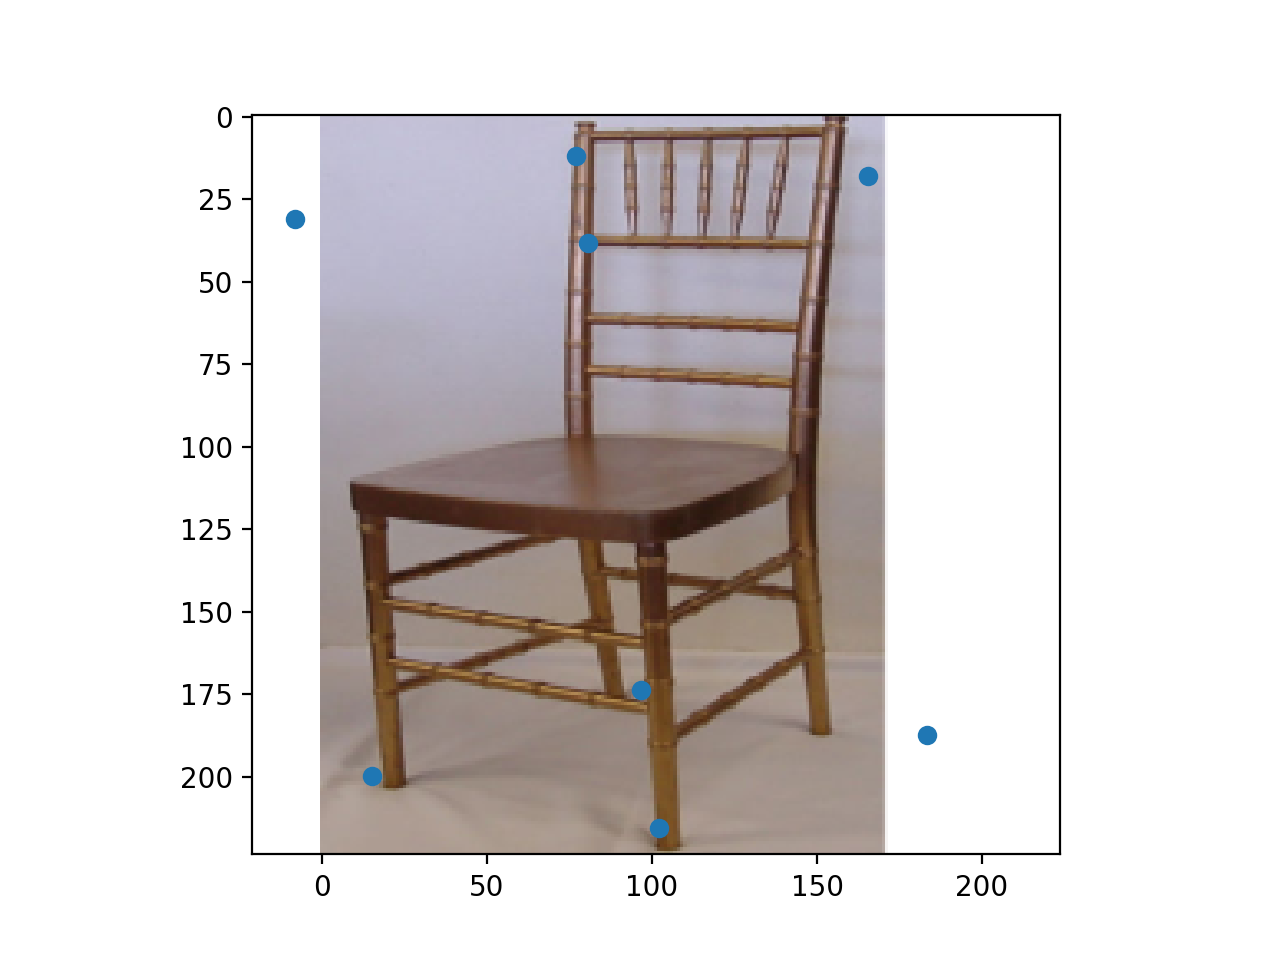

(224, 224, 3)


<IPython.core.display.Javascript object>


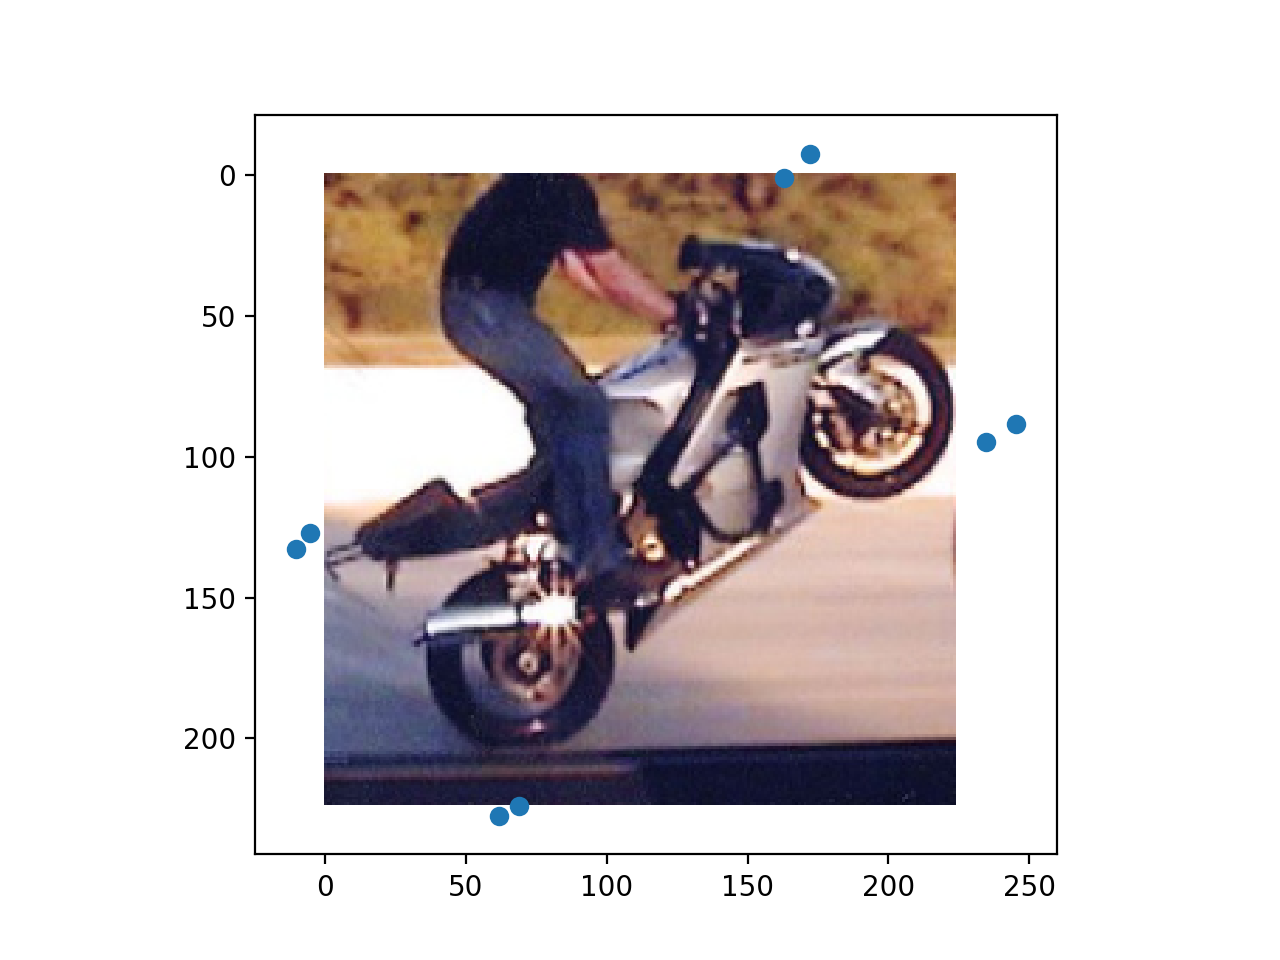

(224, 224, 3)


<IPython.core.display.Javascript object>


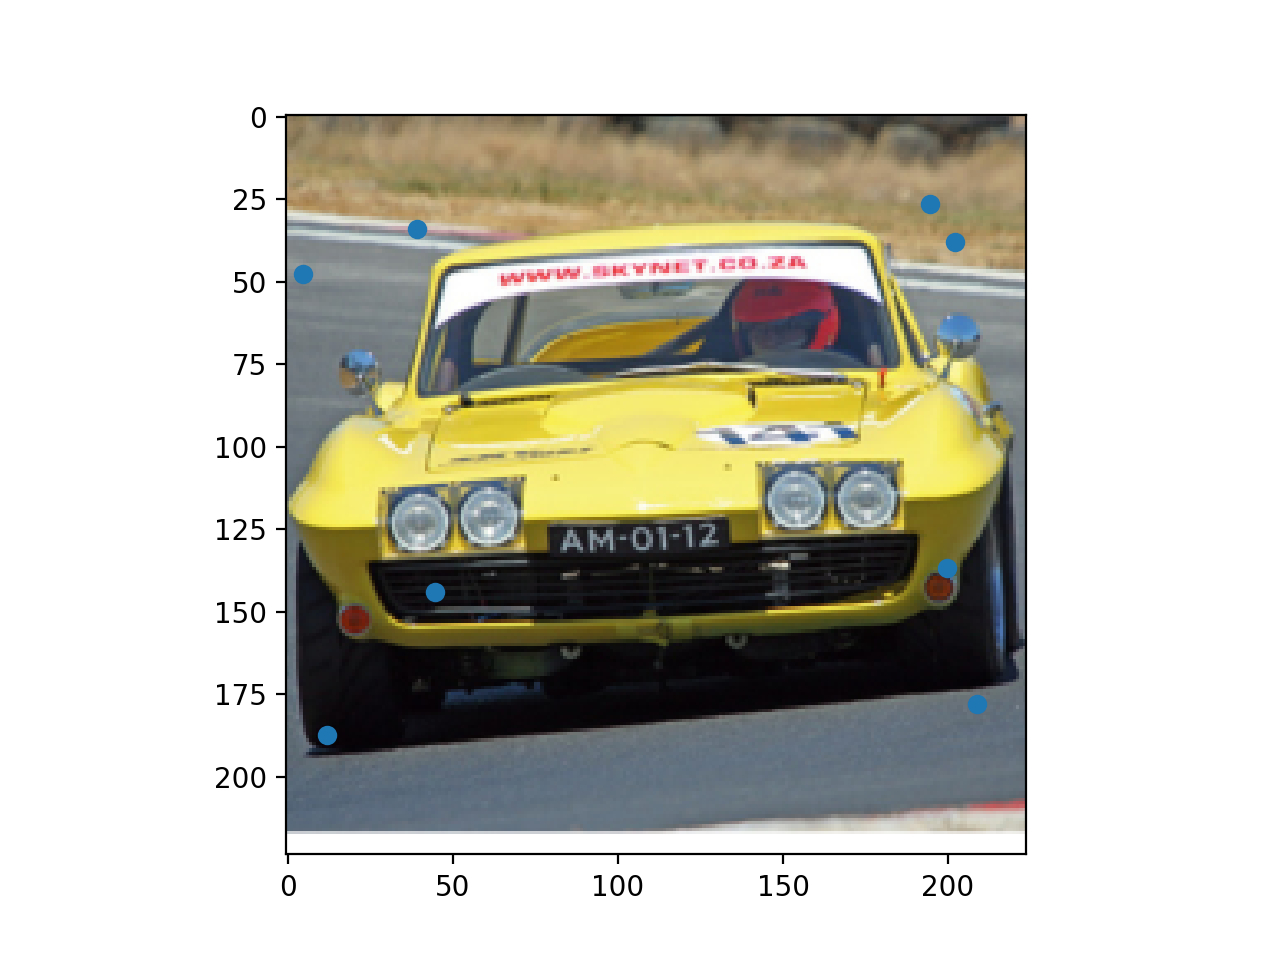

(224, 224, 3)


In [51]:
for image, output_vector in reconstructed_records:
    fig = plt.figure()
    print(image.shape)
    plt.imshow(image)
    
    virtual_control_points = np.array(output_vector[:16]).reshape(8,2) * 224
    plt.scatter(virtual_control_points[:, 0], virtual_control_points[:, 1])
    plt.show()

# scale the normalized 2d control points
#Plot the points

In [15]:
data_type = 'all'
dataset = pascal3d.dataset.Pascal3DDataset(data_type, generate=False)

<IPython.core.display.Javascript object>


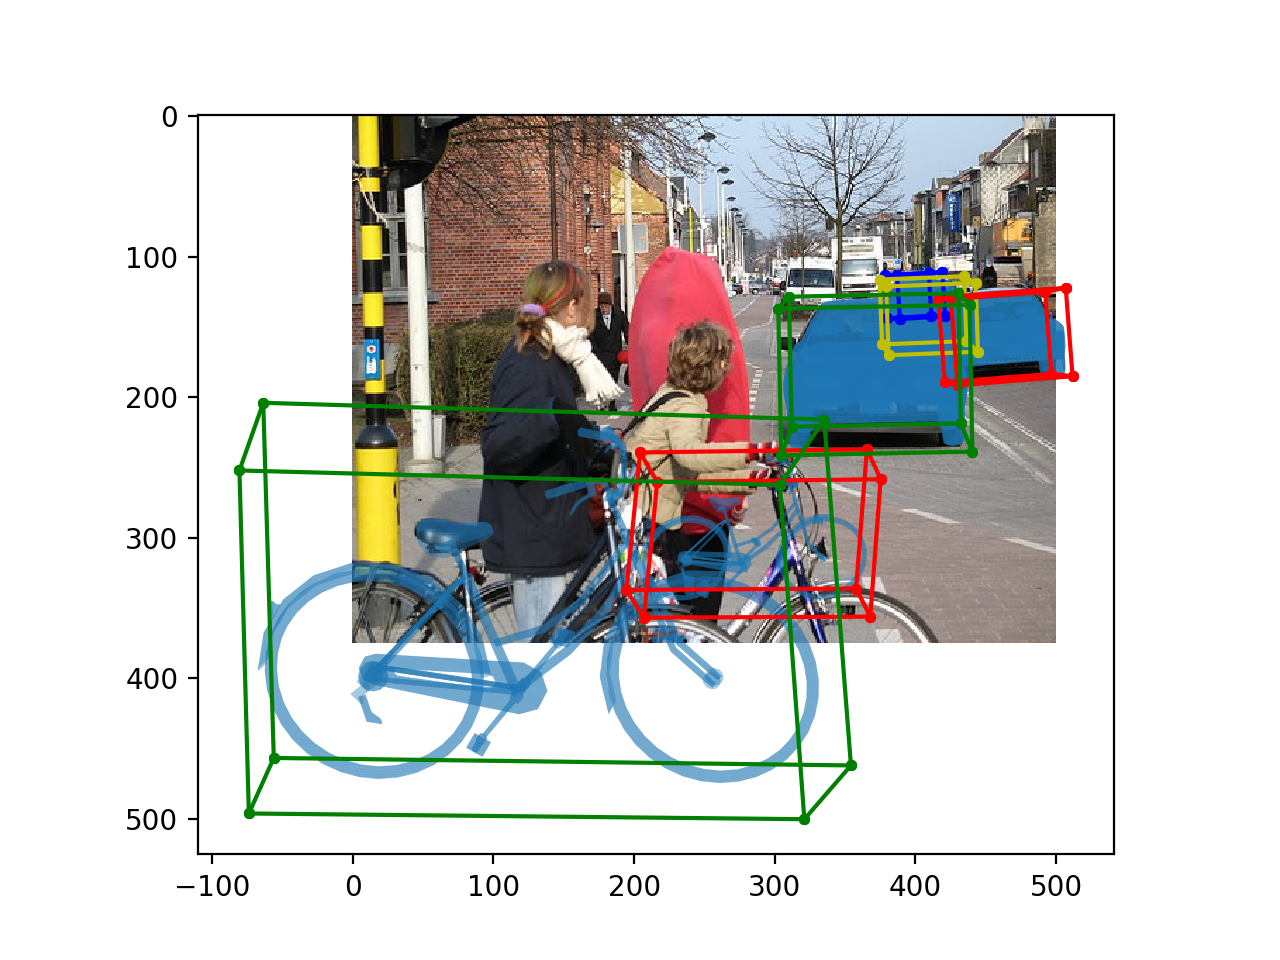

<IPython.core.display.Javascript object>


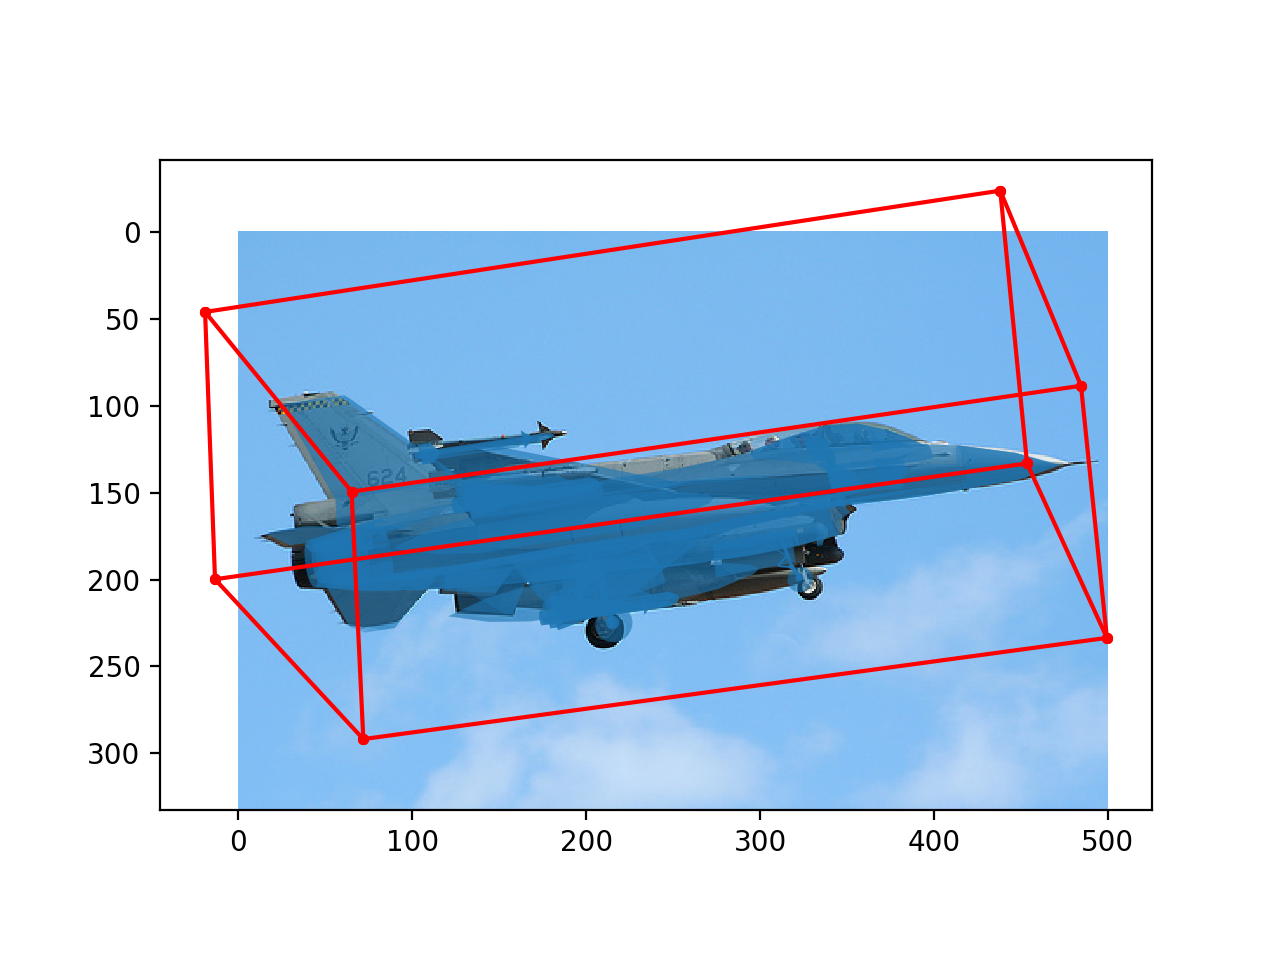

<IPython.core.display.Javascript object>


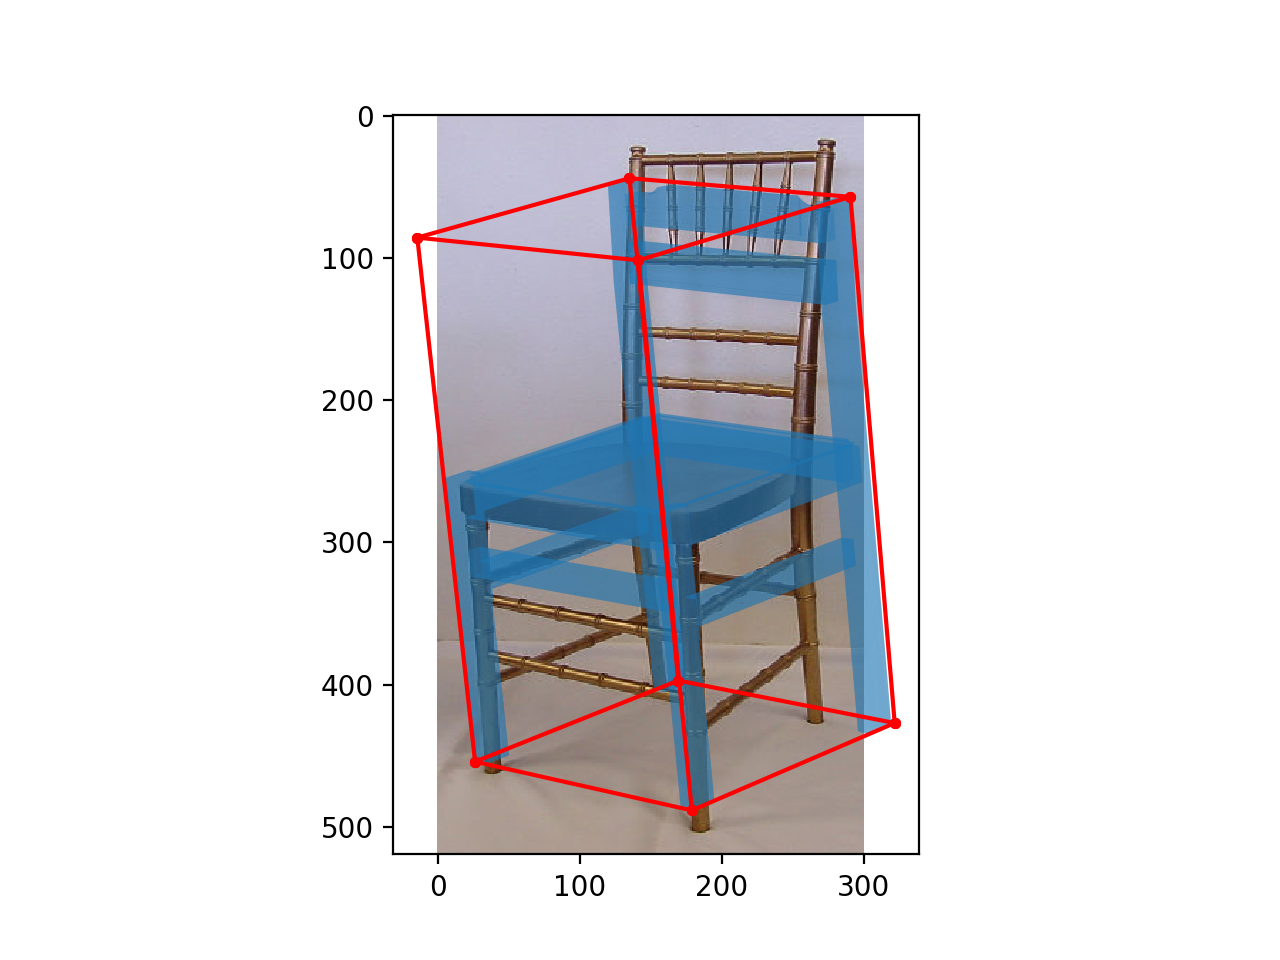

<IPython.core.display.Javascript object>


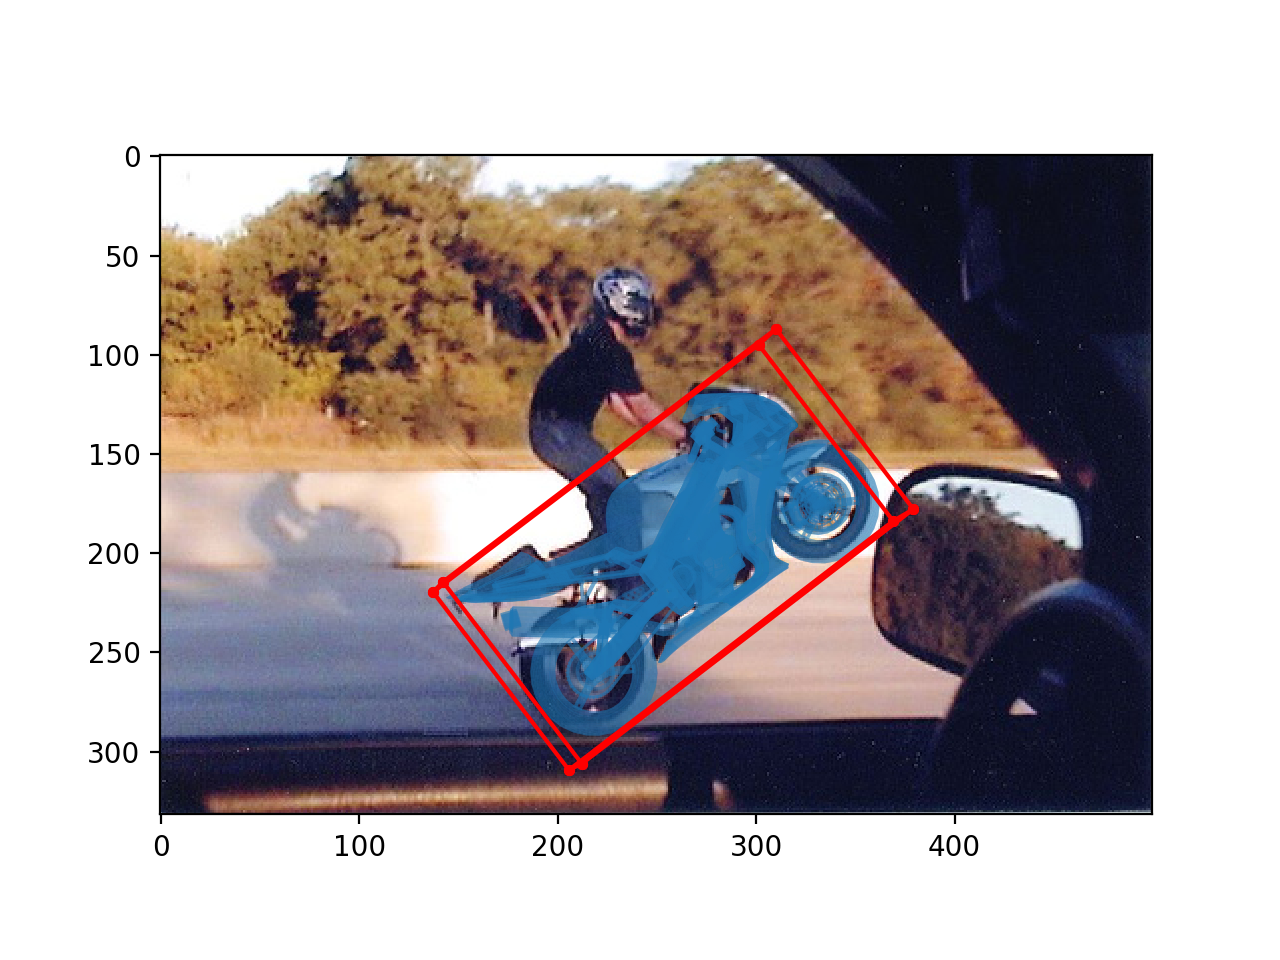

<IPython.core.display.Javascript object>


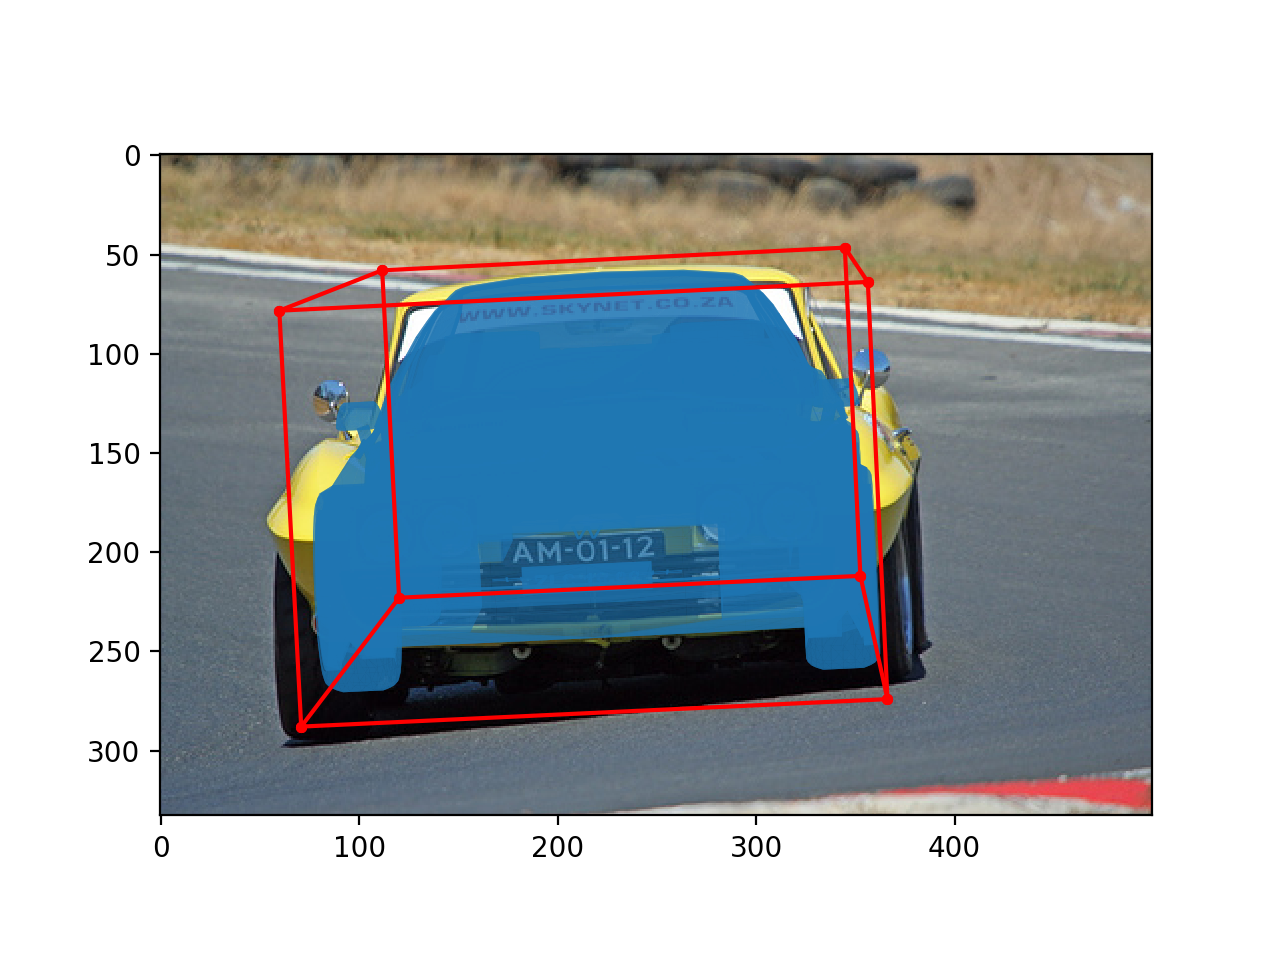

In [31]:
for data_id in  ['2008_003140', '2010_001174', 'n03001627_447', '2008_000144', '2008_000189']:
    dataset.show_virtual_control_points(0, data_id)